In [1]:
# Importaciones
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Leer los datos del archivo Excel. Éstos se transforman en un Data Frame de Pandas
data = pd.read_excel("data.xlsx", header=None, names=['horas_entre_falla']).squeeze(True)

# Muestra de los diez primeros datos. La unidad de tiempo es 'hora'
data.head(10)

0    424.00
1     25.50
2      3.00
3     16.25
4      4.00
5     13.90
6     19.33
7     16.83
8      7.50
9     34.08
Name: horas_entre_falla, dtype: float64

In [3]:
# Muestra de los diez últimos datos. La unidad de tiempo es 'hora'
data.tail(10)

58    179.4
59      5.5
60      2.0
61      2.0
62     12.2
63      0.6
64     12.0
65     95.9
66     34.5
67      2.3
Name: horas_entre_falla, dtype: float64

In [4]:
# Imprime el tipo dato
print(f'El tipo de dato es {data.dtype}')

El tipo de dato es float64


In [5]:
# El número de fallas de la máquina
numero_fallas = len(data)
print(f'El número de fallas es {numero_fallas}')

El número de fallas es 68


In [6]:
# Número total de horas que ha funcionado la máquina
total_horas = data.sum()
print(f'El número total de horas de funcionamiento es {round(total_horas, 2)}')

El número total de horas de funcionamiento es 3286.32


In [7]:
# Aquí se calcula la media de horas de funcionamiento entre fallas
media = total_horas/numero_fallas
print(f'La cantidad promedio de horas de funcionamiento es {round(media, 2)} horas/falla')

La cantidad promedio de horas de funcionamiento es 48.33 horas/falla


In [8]:
# Comprobación de la media: se obtiene la media usando un método propio de los Data Frames
prueba_media = data.mean()
print(f'La media recalculada es {round(prueba_media, 2)} horas/falla')

La media recalculada es 48.33 horas/falla


In [9]:
# Tasa de fallo: cuantos fallos se dan por cada hora de funcionamiento
tasa_fallo = numero_fallas/total_horas
print(f'La tasa de fallo es {round(tasa_fallo, 2)} fallo/hora')

La tasa de fallo es 0.02 fallo/hora


In [10]:
print(f'Nótese que la tasa de fallo es el recíproco de la media, es decir: tasa de fallo = 1/media = {round(1/media, 2)}')

Nótese que la tasa de fallo es el recíproco de la media, es decir: tasa de fallo = 1/media = 0.02


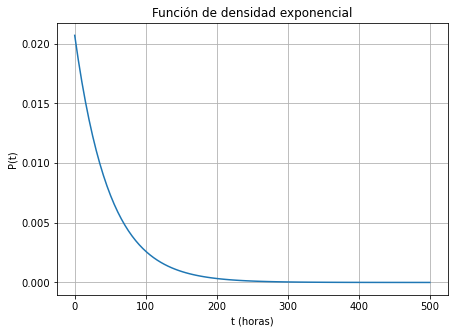

In [11]:
# Gráfica de la función de densidad exponencial
X = np.linspace(0, 500, 100)
D = tasa_fallo*np.exp(-tasa_fallo*X)

plt.figure(figsize=(7, 5))
plt.plot(X, D)
plt.title('Función de densidad exponencial')
plt.xlabel('t (horas)')
plt.ylabel('P(t)')
plt.grid()
plt.show()

In [12]:
# Tabla de probabilidad (P(T <= t))

horas = np.linspace(0, 300, 16)
P = 1 - np.exp(-tasa_fallo*horas)
d = {'horas': horas, 'probabilidad_falla': P}
tabla = pd.DataFrame(data=d, index=None)
tabla

,horas,probabilidad_falla
0,0.0,0.000000
1,20.0,0.338891
2,40.0,0.562935
3,60.0,0.711052
4,80.0,0.808974
5,100.0,0.873711
6,120.0,0.916509
7,140.0,0.944804
8,160.0,0.963509
9,180.0,0.975876


In [13]:
tabla['confiabilidad'] = 1 - tabla['probabilidad_falla']
tabla.head()

,horas,probabilidad_falla,confiabilidad
0,0.0,0.000000,1.000000
1,20.0,0.338891,0.661109
2,40.0,0.562935,0.437065
3,60.0,0.711052,0.288948
4,80.0,0.808974,0.191026


In [14]:
tabla

,horas,probabilidad_falla,confiabilidad
0,0.0,0.000000,1.000000
1,20.0,0.338891,0.661109
2,40.0,0.562935,0.437065
3,60.0,0.711052,0.288948
4,80.0,0.808974,0.191026
5,100.0,0.873711,0.126289
6,120.0,0.916509,0.083491
7,140.0,0.944804,0.055196
8,160.0,0.963509,0.036491
9,180.0,0.975876,0.024124


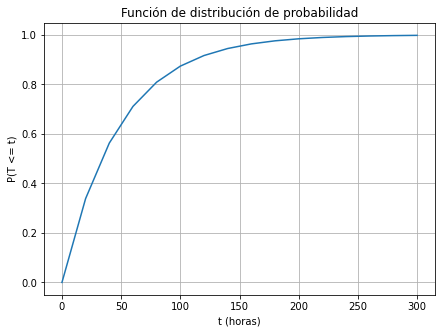

In [15]:
# Gráfica de la distribución de probabilidad

plt.figure(figsize=(7, 5))
plt.plot(tabla['horas'], tabla['probabilidad_falla'])
plt.title('Función de distribución de probabilidad')
plt.xlabel('t (horas)')
plt.ylabel('P(T <= t)')
plt.grid()
plt.show()

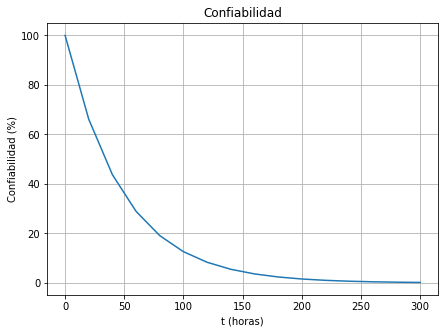

In [16]:
# Cálculo de la confiabilidad
C = 1-P

plt.figure(figsize=(7, 5))
plt.plot(horas, C*100)
plt.xlabel('t (horas)')
plt.ylabel('Confiabilidad (%)')
plt.title('Confiabilidad')
plt.grid()
plt.show()